In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="7GSRMvm7mcX1EStMuGqH")
project = rf.workspace("alavia-batool-ov8a3").project("mango-diseases-dataset-cqbvo")
version = project.version(1)
dataset = version.download("coco-segmentation")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 83.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Mango-Diseases-Dataset-1 in coco-segmentation:: 100%|██████████| 774/774 [00:01<00:00, 691.39it/s]


In [2]:
import os
os.getcwd()

'/content'

In [3]:
from pycocotools.coco import COCO
import numpy as np
import cv2, os, shutil

def coco_to_masks_and_images(json_path, img_dir, out_dir):
    img_out_dir = os.path.join(out_dir, "images")
    mask_out_dir = os.path.join(out_dir, "masks")

    os.makedirs(img_out_dir, exist_ok=True)
    os.makedirs(mask_out_dir, exist_ok=True)

    coco = COCO(json_path)
    for img_id in coco.getImgIds():
        img_info = coco.loadImgs(img_id)[0]
        h, w = img_info['height'], img_info['width']
        mask = np.zeros((h, w), dtype=np.uint8)

        ann_ids = coco.getAnnIds(imgIds=img_id)
        anns = coco.loadAnns(ann_ids)

        for ann in anns:
            cat_id = ann['category_id']
            rle = coco.annToMask(ann)
            mask[rle > 0] = cat_id

        # Save mask
        mask_filename = img_info['file_name'].replace(".jpg", ".png")
        mask_path = os.path.join(mask_out_dir, mask_filename)
        cv2.imwrite(mask_path, mask)

        # Copy original image
        src_img_path = os.path.join(img_dir, img_info['file_name'])
        dst_img_path = os.path.join(img_out_dir, img_info['file_name'])
        if os.path.exists(src_img_path):
            shutil.copy(src_img_path, dst_img_path)

# Run for train/val/test
coco_to_masks_and_images(
    "/content/Mango-Diseases-Dataset-1/train/_annotations.coco.json",
    "/content/Mango-Diseases-Dataset-1/train",
    "/content/data/mango/train"
)

coco_to_masks_and_images(
    "/content/Mango-Diseases-Dataset-1/test/_annotations.coco.json",
    "/content/Mango-Diseases-Dataset-1/test",
    "/content/data/mango/val"
)

coco_to_masks_and_images(
    "/content/Mango-Diseases-Dataset-1/valid/_annotations.coco.json",
    "/content/Mango-Diseases-Dataset-1/valid",
    "/content/data/mango/test"
)


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [4]:
import os
os.getcwd()

# !cd /content

'/content'

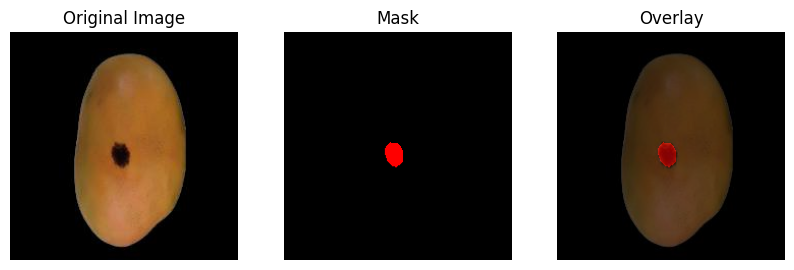

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def overlay_mask(img_path, mask_path, alpha=0.5):
    # Load image (RGB)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Load mask (class IDs)
    mask = cv2.imread(mask_path, cv2.IMREAD_UNCHANGED)

    # Define color map (extend if you have more classes)
    colors = {
        0: (0, 0, 0),         # background = black
        1: (255, 0, 0),       # class 1 = red
        2: (0, 255, 0),       # class 2 = green
        3: (0, 0, 255),       # class 3 = blue
        4: (255, 255, 0),     # class 4 = yellow
    }

    # Create color mask
    h, w = mask.shape
    color_mask = np.zeros((h, w, 3), dtype=np.uint8)
    for class_id, color in colors.items():
        color_mask[mask == class_id] = color

    # Overlay: blend image + mask
    overlay = cv2.addWeighted(img, 1 - alpha, color_mask, alpha, 0)

    # Show
    plt.figure(figsize=(10,5))
    plt.subplot(1,3,1)
    plt.title("Original Image")
    plt.imshow(img)
    plt.axis("off")

    plt.subplot(1,3,2)
    plt.title("Mask")
    plt.imshow(color_mask)
    plt.axis("off")

    plt.subplot(1,3,3)
    plt.title("Overlay")
    plt.imshow(overlay)
    plt.axis("off")

    plt.show()


# Example usage:
img_path = "/content/Mango-Diseases-Dataset-1/train/Alternaria_005_jpg.rf.88fd75f699acd491aeb14a43915c769e.jpg"
mask_path = "/content/data/mango/train/masks/Alternaria_005_jpg.rf.88fd75f699acd491aeb14a43915c769e.png"

overlay_mask(img_path, mask_path)


In [6]:
!pip install pycocotools albumentations


In [7]:
from torch.utils.data import Dataset
from PIL import Image
import numpy as np
import os

from PIL import UnidentifiedImageError

class MangoSegDataset(Dataset):
    def __init__(self, img_dir, mask_dir, transform=None):
        self.img_dir = img_dir
        self.mask_dir = mask_dir
        self.transform = transform

        self.img_files = []
        for f in sorted(os.listdir(img_dir)):
            if f.lower().endswith((".jpg", ".jpeg", ".png")):
                # Always replace extension robustly
                base = os.path.splitext(f)[0]
                mask_path = os.path.join(mask_dir, base + ".png")
                if os.path.exists(mask_path):
                    self.img_files.append(f)
                else:
                    print(f"⚠️ No mask found for {f}")

    def __len__(self):
        return len(self.img_files)

    def __getitem__(self, idx):
        img_name = self.img_files[idx]
        base = os.path.splitext(img_name)[0]

        img_path = os.path.join(self.img_dir, img_name)
        mask_path = os.path.join(self.mask_dir, base + ".png")

        try:
            img = Image.open(img_path).convert("RGB")
            mask = Image.open(mask_path)
        except Exception as e:
            raise RuntimeError(f"❌ Failed loading: {img_path}, {mask_path}\n{e}")

        img, mask = np.array(img), np.array(mask)

        if self.transform:
            augmented = self.transform(image=img, mask=mask)
            img, mask = augmented["image"], augmented["mask"]

        return img, mask


In [8]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

train_tf = A.Compose([
    A.Resize(512, 512),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.ShiftScaleRotate(p=0.5),
    A.Normalize(mean=(0.485,0.456,0.406), std=(0.229,0.224,0.225)),
    ToTensorV2()
])

val_tf = A.Compose([
    A.Resize(512, 512),
    A.Normalize(mean=(0.485,0.456,0.406), std=(0.229,0.224,0.225)),
    ToTensorV2()
])


ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.


In [9]:
from torch.utils.data import DataLoader

train_ds = MangoSegDataset("/content/data/mango/train/images", "/content/data/mango/train/masks", transform=train_tf)
val_ds   = MangoSegDataset("/content/data/mango/val/images", "/content/data/mango/val/masks", transform=val_tf)
test_ds = MangoSegDataset("/content/data/mango/test/images", "/content/data/mango/test/masks", transform=val_tf)

train_loader = DataLoader(train_ds, batch_size=8, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_ds, batch_size=8, shuffle=False, num_workers=2)
test_loader = DataLoader(test_ds, batch_size=8, shuffle=True, num_workers=2)


In [10]:
import os
import numpy as np
from PIL import Image

mask_dir = "data/mango/train/masks"

all_classes = set()
for f in os.listdir(mask_dir):
    mask = np.array(Image.open(os.path.join(mask_dir, f)))
    unique_vals = np.unique(mask)
    all_classes.update(unique_vals.tolist())

print("Unique class IDs in masks:", all_classes)
print("Number of classes (including background):", len(all_classes))


Unique class IDs in masks: {0, 1, 2, 3, 4, 5}
Number of classes (including background): 6


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models.segmentation as segmentation

device = "cuda" if torch.cuda.is_available() else "cpu"

# Number of classes in your masks (background + diseases)
num_classes = 6   # change this according to your dataset

# Load pretrained model
model = segmentation.deeplabv3_mobilenet_v3_large(pretrained=True)

# Replace final classifier layer
model.classifier[4] = nn.Conv2d(256, num_classes, kernel_size=1)

model = model.to(device)


The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_MobileNet_V3_Large_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.


Downloading: "https://download.pytorch.org/models/deeplabv3_mobilenet_v3_large-fc3c493d.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_mobilenet_v3_large-fc3c493d.pth


100%|██████████| 42.3M/42.3M [00:00<00:00, 124MB/s]


In [13]:
criterion = nn.CrossEntropyLoss()  # expects masks as LongTensor with class indices
optimizer = optim.Adam(model.parameters(), lr=1e-4)

In [14]:
def train_one_epoch(model, loader, optimizer, loss_fn, device):
    model.train()
    total_loss = 0
    for imgs, masks in loader:
        imgs, masks = imgs.to(device), masks.to(device).long()  # masks need to be Long

        optimizer.zero_grad()
        outputs = model(imgs)["out"]  # Deeplab outputs a dict
        loss = loss_fn(outputs, masks)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    return total_loss / len(loader)

def eval_one_epoch(model, loader, loss_fn, device):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for imgs, masks in loader:
            imgs, masks = imgs.to(device), masks.to(device).long()
            outputs = model(imgs)["out"]
            loss = loss_fn(outputs, masks)
            total_loss += loss.item()
    return total_loss / len(loader)


In [15]:
for f in train_ds.img_files:
    try:
        Image.open(os.path.join(train_ds.img_dir, f)).verify()
    except:
        print("Bad image:", f)


In [16]:
!ls data/mango/train/masks | head



Alternaria_005_jpg.rf.88fd75f699acd491aeb14a43915c769e.png
Alternaria_006_jpg.rf.80059a2ea372cdbfae409576bc3c6460.png
Alternaria_008_jpg.rf.77d4e869d01cff4b703544ecf9262a49.png
Alternaria_009_jpg.rf.037049292da82d36d13198eb0c3893e5.png
Alternaria_010_jpg.rf.0c839a2e2bb5aed529a63eb4ca98cad4.png
Alternaria_011_jpg.rf.f5f6373568cee1c58579b7ccb0d3b97e.png
Alternaria_013_jpg.rf.48db67230903dff65ef0e0b22c11b7fa.png
Alternaria_014_jpg.rf.8b1a685e6391f6fdccb2698fd6b93306.png
Alternaria_016_jpg.rf.da7bd688e053a72841a6d8de35663f88.png
Alternaria_018_jpg.rf.06211eb0afba249d7e5dacca9c08da84.png


In [17]:
epochs = 30
for epoch in range(epochs):
    train_loss = train_one_epoch(model, train_loader, optimizer, criterion, device)
    val_loss = eval_one_epoch(model, val_loader, criterion, device)

    print(f"Epoch [{epoch+1}/{epochs}] "
          f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")

Epoch [1/30] Train Loss: 1.2586 | Val Loss: 0.7971
Epoch [2/30] Train Loss: 0.4845 | Val Loss: 0.4903


KeyboardInterrupt: 

In [ ]:
torch.save(model, "deeplabv3_mobilenet_mango.pth")

In [ ]:
model.eval()
imgs, masks = next(iter(val_loader))
imgs = imgs.to(device)

with torch.no_grad():
    outputs = model(imgs)["out"]
preds = torch.argmax(outputs, dim=1).cpu().numpy()

print("Predicted mask shape:", preds[0].shape)


Predicted mask shape: (512, 512)


In [23]:
import os
print(os.path.getsize("/content/deeplabv3_mobilenet_mango (1).pth"))
trained_model = torch.load("/content/deeplabv3_mobilenet_mango (1).pth", weights_only=False)


44393387


In [22]:
from PIL import Image
import torchvision.transforms as T
import matplotlib.pyplot as plt


device = "cuda" if torch.cuda.is_available() else "cpu"

def predict_single_image(model, img_path, device):
    model.eval()
    transform = T.Compose([
        T.Resize((512,512)),
        T.ToTensor(),
        T.Normalize(mean=(0.485,0.456,0.406), std=(0.229,0.224,0.225)),
    ])

    img = Image.open(img_path)
    inp = transform(img).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(inp)["out"]
        pred = torch.argmax(output, dim=1).squeeze().cpu().numpy()

    return img, pred

# Example
img, pred_mask = predict_single_image(trained_model, "/content/data/mango/test/images/Alternaria_048_jpg.rf.f7c50dc2cad218abf6c6ba9f3e9057ee.jpg", device)
plt.subplot(1,2,1); plt.imshow(img); plt.title("Image")
plt.subplot(1,2,2); plt.imshow(pred_mask, cmap="tab20"); plt.title("Predicted Mask")
plt.show()


NameError: name 'trained_model' is not defined

In [ ]:
test_loss = eval_one_epoch(trained_model, test_loader, criterion, device)
print(f"Test loss: {test_loss}")

Test loss: 0.06699644224718213


In [ ]:
import numpy as np
import torch

def compute_metrics(preds, masks, num_classes):
    """Compute Pixel Accuracy, Mean IoU, Mean Dice."""
    preds = preds.view(-1)
    masks = masks.view(-1)

    correct = (preds == masks).sum().item()
    total = torch.numel(masks)
    pixel_acc = correct / total

    iou_per_class = []
    dice_per_class = []

    for cls in range(num_classes):
        pred_inds = preds == cls
        target_inds = masks == cls

        intersection = (pred_inds & target_inds).sum().item()
        union = pred_inds.sum().item() + target_inds.sum().item() - intersection
        dice_denom = pred_inds.sum().item() + target_inds.sum().item()

        if union > 0:
            iou_per_class.append(intersection / union)
        if dice_denom > 0:
            dice_per_class.append((2 * intersection) / dice_denom)

    mean_iou = np.mean(iou_per_class) if iou_per_class else 0
    mean_dice = np.mean(dice_per_class) if dice_per_class else 0

    return pixel_acc, mean_iou, mean_dice


def train_one_epoch(model, loader, optimizer, loss_fn, device, num_classes):
    model.train()
    total_loss, total_acc, total_iou, total_dice = 0, 0, 0, 0

    for imgs, masks in loader:
        imgs, masks = imgs.to(device), masks.to(device).long()

        optimizer.zero_grad()
        outputs = model(imgs)["out"]
        loss = loss_fn(outputs, masks)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        preds = torch.argmax(outputs, dim=1)
        acc, iou, dice = compute_metrics(preds, masks, num_classes)
        total_acc += acc
        total_iou += iou
        total_dice += dice

    n = len(loader)
    return (
        total_loss / n,
        total_acc / n,
        total_iou / n,
        total_dice / n,
    )


def eval_one_epoch(model, loader, loss_fn, device, num_classes):
    model.eval()
    total_loss, total_acc, total_iou, total_dice = 0, 0, 0, 0

    with torch.no_grad():
        for imgs, masks in loader:
            imgs, masks = imgs.to(device), masks.to(device).long()
            outputs = model(imgs)["out"]
            loss = loss_fn(outputs, masks)
            total_loss += loss.item()

            preds = torch.argmax(outputs, dim=1)
            acc, iou, dice = compute_metrics(preds, masks, num_classes)
            total_acc += acc
            total_iou += iou
            total_dice += dice

    n = len(loader)
    return (
        total_loss / n,
        total_acc / n,
        total_iou / n,
        total_dice / n,
    )


In [ ]:
num_classes = 6  # background + 5 mango categories


val_loss, val_acc, val_iou, val_dice = eval_one_epoch(
    trained_model, val_loader, criterion, device, num_classes
)
test_loss, test_acc, test_iou, test_dice = eval_one_epoch(
    trained_model, test_loader, criterion, device, num_classes
)

print(f"Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}, IoU: {val_iou:.4f}, Dice: {val_dice:.4f}"
      f"Test Loss: {test_loss:.4f}, Acc: {test_acc:.4f}, IoU: {test_iou:.4f}, Dice: {test_dice:.4f}")


Val Loss: 0.0444, Acc: 0.9861, IoU: 0.4583, Dice: 0.4989Test Loss: 0.0679, Acc: 0.9776, IoU: 0.4894, Dice: 0.5407


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_predictions(model, loader, device, num_images=5):
    model.eval()
    images_shown = 0

    with torch.no_grad():
        for imgs, masks in loader:
            imgs, masks = imgs.to(device), masks.to(device)

            outputs = model(imgs)["out"]
            preds = torch.argmax(outputs, dim=1).cpu().numpy()
            imgs = imgs.cpu().permute(0,2,3,1).numpy()
            masks = masks.cpu().numpy()

            for i in range(len(imgs)):
                if images_shown >= num_images:
                    return
                img = imgs[i]
                mask = masks[i]
                pred = preds[i]

                # Normalize image back to [0,1] for display
                img = (img - img.min()) / (img.max() - img.min())

                plt.figure(figsize=(12,4))
                plt.subplot(1,3,1)
                plt.imshow(img)
                plt.title("Input Image")
                plt.axis("off")

                plt.subplot(1,3,2)
                plt.imshow(mask, cmap="tab20")
                plt.title("Ground Truth Mask")
                plt.axis("off")

                plt.subplot(1,3,3)
                plt.imshow(pred, cmap="tab20")
                plt.title("Predicted Mask")
                plt.axis("off")

                plt.show()
                images_shown += 1


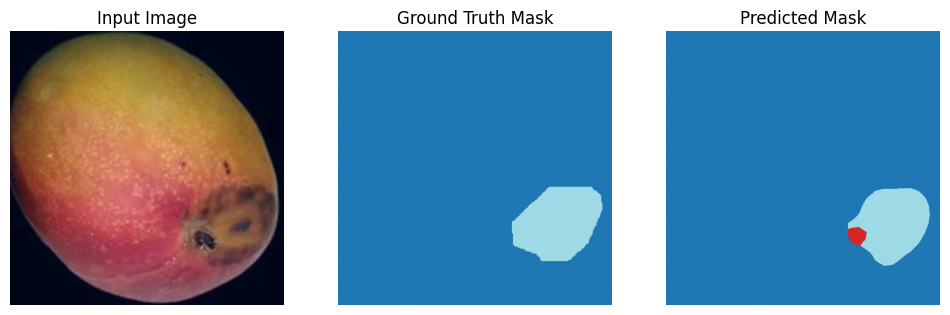

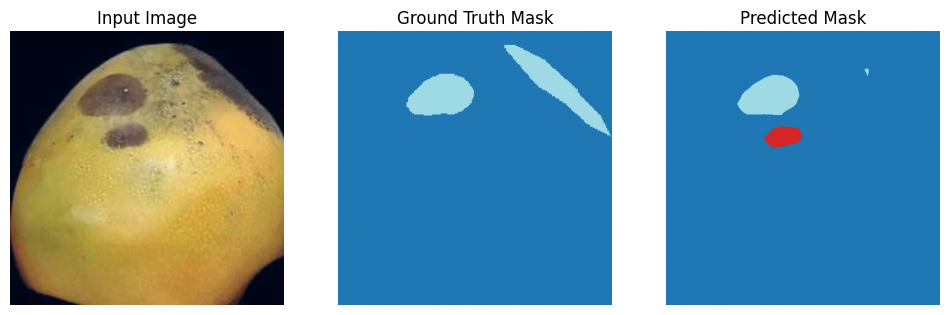

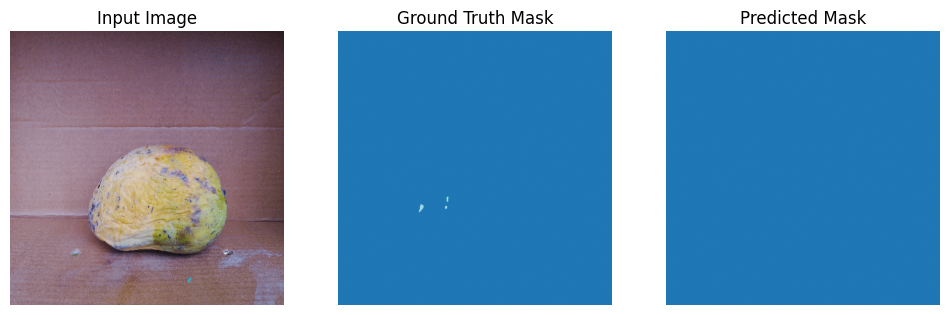

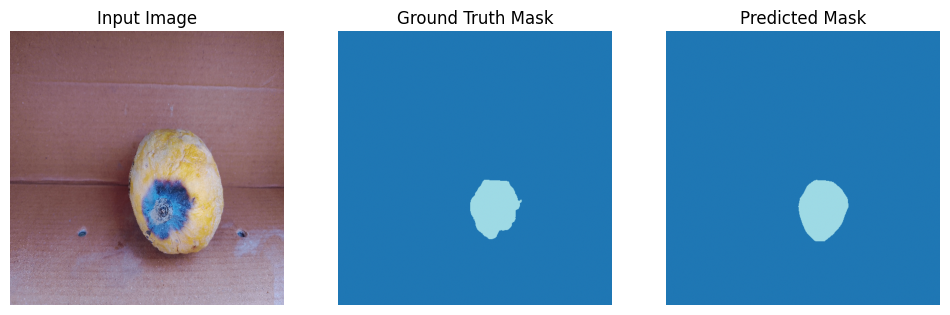

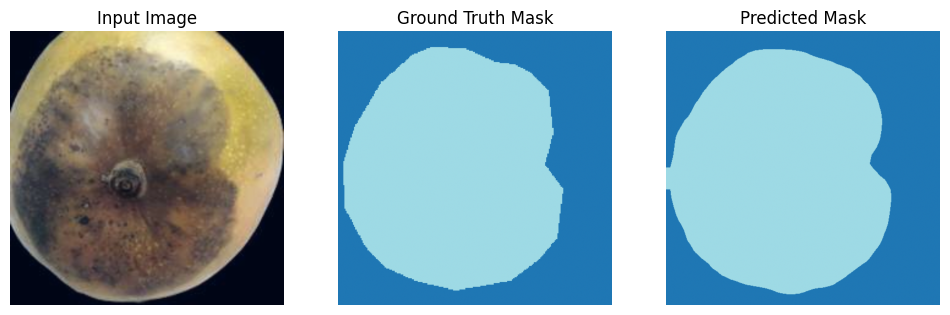

In [ ]:
visualize_predictions(trained_model, test_loader, device, num_images=5)

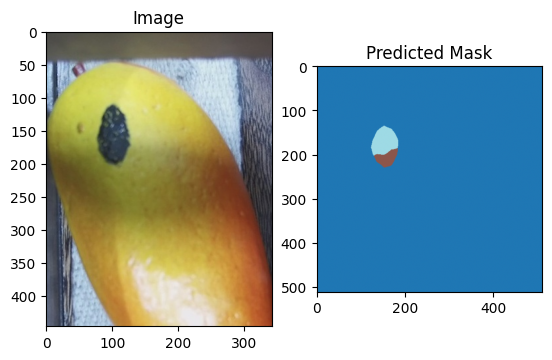

In [28]:
from PIL import Image
import torchvision.transforms as T
import matplotlib.pyplot as plt
import torch


device = "cuda" if torch.cuda.is_available() else "cpu"

def predict_single_image(model, img_path, device):
    model.eval()
    transform = T.Compose([
        T.Resize((512,512)),
        T.ToTensor(),
        T.Normalize(mean=(0.485,0.456,0.406), std=(0.229,0.224,0.225)),
    ])

    img = Image.open(img_path)
    inp = transform(img).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(inp)["out"]
        pred = torch.argmax(output, dim=1).squeeze().cpu().numpy()

    return img, pred

# Example
img, pred_mask = predict_single_image(trained_model, "/content/test.jpeg", device)
plt.subplot(1,2,1); plt.imshow(img); plt.title("Image")
plt.subplot(1,2,2); plt.imshow(pred_mask, cmap="tab20"); plt.title("Predicted Mask")
plt.show()


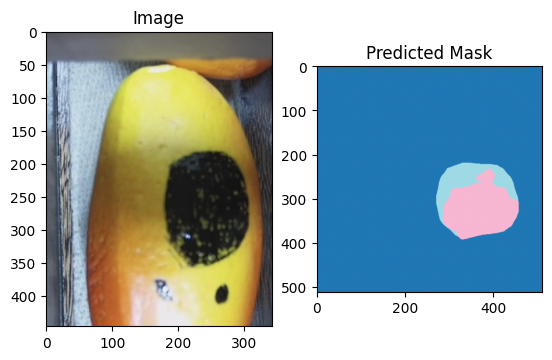

In [29]:
from PIL import Image
import torchvision.transforms as T
import matplotlib.pyplot as plt
import torch


device = "cuda" if torch.cuda.is_available() else "cpu"

def predict_single_image(model, img_path, device):
    model.eval()
    transform = T.Compose([
        T.Resize((512,512)),
        T.ToTensor(),
        T.Normalize(mean=(0.485,0.456,0.406), std=(0.229,0.224,0.225)),
    ])

    img = Image.open(img_path)
    inp = transform(img).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(inp)["out"]
        pred = torch.argmax(output, dim=1).squeeze().cpu().numpy()

    return img, pred

# Example
img, pred_mask = predict_single_image(trained_model, "/content/tst.jpeg", device)
plt.subplot(1,2,1); plt.imshow(img); plt.title("Image")
plt.subplot(1,2,2); plt.imshow(pred_mask, cmap="tab20"); plt.title("Predicted Mask")
plt.show()


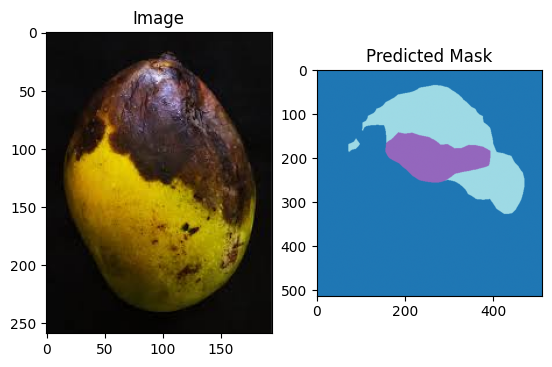

In [31]:
from PIL import Image
import torchvision.transforms as T
import matplotlib.pyplot as plt
import torch


device = "cuda" if torch.cuda.is_available() else "cpu"

def predict_single_image(model, img_path, device):
    model.eval()
    transform = T.Compose([
        T.Resize((512,512)),
        T.ToTensor(),
        T.Normalize(mean=(0.485,0.456,0.406), std=(0.229,0.224,0.225)),
    ])

    img = Image.open(img_path)
    inp = transform(img).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(inp)["out"]
        pred = torch.argmax(output, dim=1).squeeze().cpu().numpy()

    return img, pred

# Example
img, pred_mask = predict_single_image(trained_model, "/content/stm.jpg", device)
plt.subplot(1,2,1); plt.imshow(img); plt.title("Image")
plt.subplot(1,2,2); plt.imshow(pred_mask, cmap="tab20"); plt.title("Predicted Mask")
plt.show()


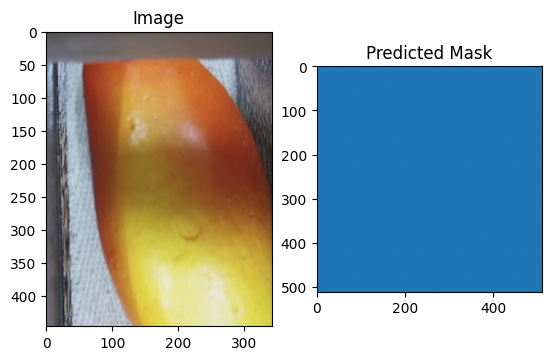

In [32]:
from PIL import Image
import torchvision.transforms as T
import matplotlib.pyplot as plt
import torch


device = "cuda" if torch.cuda.is_available() else "cpu"

def predict_single_image(model, img_path, device):
    model.eval()
    transform = T.Compose([
        T.Resize((512,512)),
        T.ToTensor(),
        T.Normalize(mean=(0.485,0.456,0.406), std=(0.229,0.224,0.225)),
    ])

    img = Image.open(img_path)
    inp = transform(img).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(inp)["out"]
        pred = torch.argmax(output, dim=1).squeeze().cpu().numpy()

    return img, pred

# Example
img, pred_mask = predict_single_image(trained_model, "/content/clean.jpeg", device)
plt.subplot(1,2,1); plt.imshow(img); plt.title("Image")
plt.subplot(1,2,2); plt.imshow(pred_mask, cmap="tab20"); plt.title("Predicted Mask")
plt.show()
